# Business Case:-Prediciting the Health Insurance Cost

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Uploading the data from csv file to a Pandas dataframe
insurance_cost = pd.read_csv('datasets_13720_18513_insurance(1).csv')


# Basic understanding of features-- Domain Analysis**

The dataset includes information about the insurance policy holder, their dependents, and their medical expenses throughout a year.

Age: Age of primary policyholder.

Sex: Sex of the policy policyholder.

BMI: Body Mass Index of policyholder, defined as the body mass divided by the square of the body height (kg/m2).

Smoker status: Whether the policyholder is a smoker or a non-smoker.

Children: Number of children/dependents covered in the policy.

Region of residence: Residential areas of the policy holder (in the US) - North East, South East, South West, North West.

Charges: Yearly medical expenses billed by the medical insurance provider ($).


# Basic Checks on Data

In [3]:
insurance_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_cost.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
insurance_cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_cost.shape

(1338, 7)

In [8]:
print("Number of Rows",insurance_cost.shape[0])
print("Number of Columns",insurance_cost.shape[1])

Number of Rows 1338
Number of Columns 7


# Exploratory Data Analysis

## Univariate Analysis-Analyzing single variable

In [9]:
## Renaming certain columns just to make analysis easy
insurance_cost.rename(columns={'age':'Age','sex':'Sex',
                     'bmi':'BMI',
                     'children':'Children','smoker':'Smoker','region':'Region','charges':'Charges'}
            ,inplace=True)

In [10]:
insurance_cost.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Charges'], dtype='object')

C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


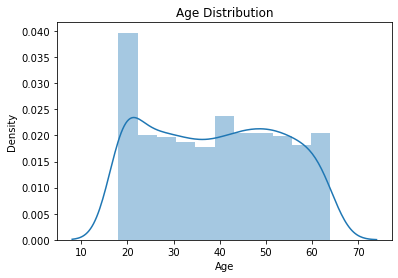

In [11]:
## Analyszing Age

sns.distplot(insurance_cost.Age.dropna(axis=0))
plt.title('Age Distribution')
## Normal distribution
plt.show()

C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


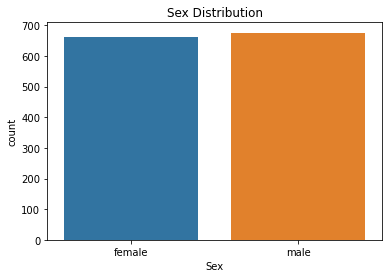

In [12]:
## Analyszing Sex ,we are using count plot for this categorical data.

sns.countplot(insurance_cost.Sex.dropna(axis=0))
plt.title('Sex Distribution')
## Normal distribution
plt.show()

C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


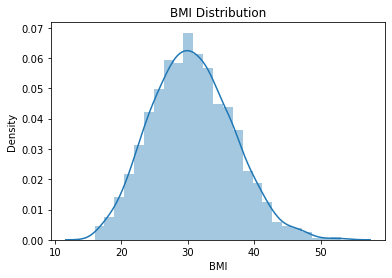

In [13]:
## Analyszing BMI

sns.distplot(insurance_cost.BMI.dropna(axis=0))
plt.title('BMI Distribution')
## Normal distribution
plt.show()

C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


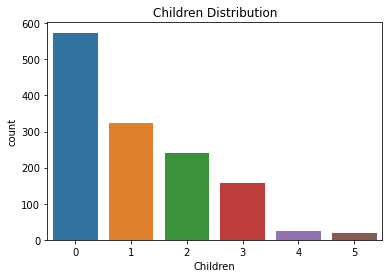

In [14]:
## Analyszing Children

sns.countplot(insurance_cost.Children.dropna(axis=0))
plt.title('Children Distribution')
## Normal distribution
plt.show()

In [15]:
insurance_cost['Children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: Children, dtype: int64

C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


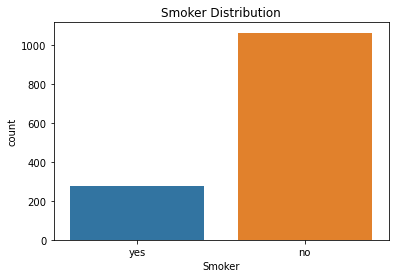

In [16]:
## Analyszing Smoker

sns.countplot(insurance_cost.Smoker.dropna(axis=0))
plt.title('Smoker Distribution')
## Normal distribution
plt.show()

C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


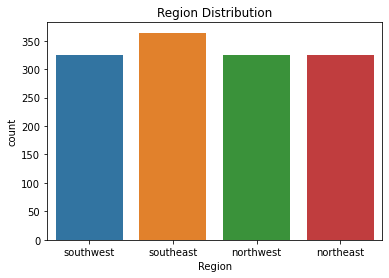

In [17]:
## Analyszing Region

sns.countplot(insurance_cost.Region.dropna(axis=0))
plt.title('Region Distribution')
## Normal distribution
plt.show()

C:\Users\ROG ZEPHYRUS\anaconda3\Data science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


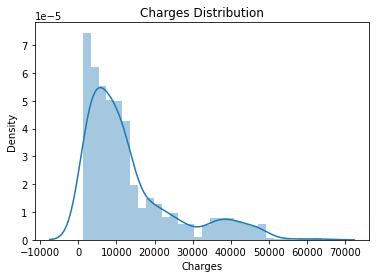

In [18]:
## Analyszing Charges

sns.distplot(insurance_cost.Charges.dropna(axis=0))
plt.title('Charges Distribution')
## Normal distribution
plt.show()

In [19]:
#Encoding sex column
insurance_cost.replace({'Sex':{'male':1,'female':0}},inplace=True)

In [20]:
insurance_cost.replace({'Smoker':{'yes':1,'no':0}},inplace=True)

In [21]:
insurance_cost.replace({'Region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [22]:
insurance_cost

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


## Bivariate Analysis-->Analyzing 2 variables at a time.

In [23]:
insurance_cost1=insurance_cost[['Age','Sex', 'BMI','Children','Smoker','Region','Charges']]

In [24]:
insurance_cost1

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


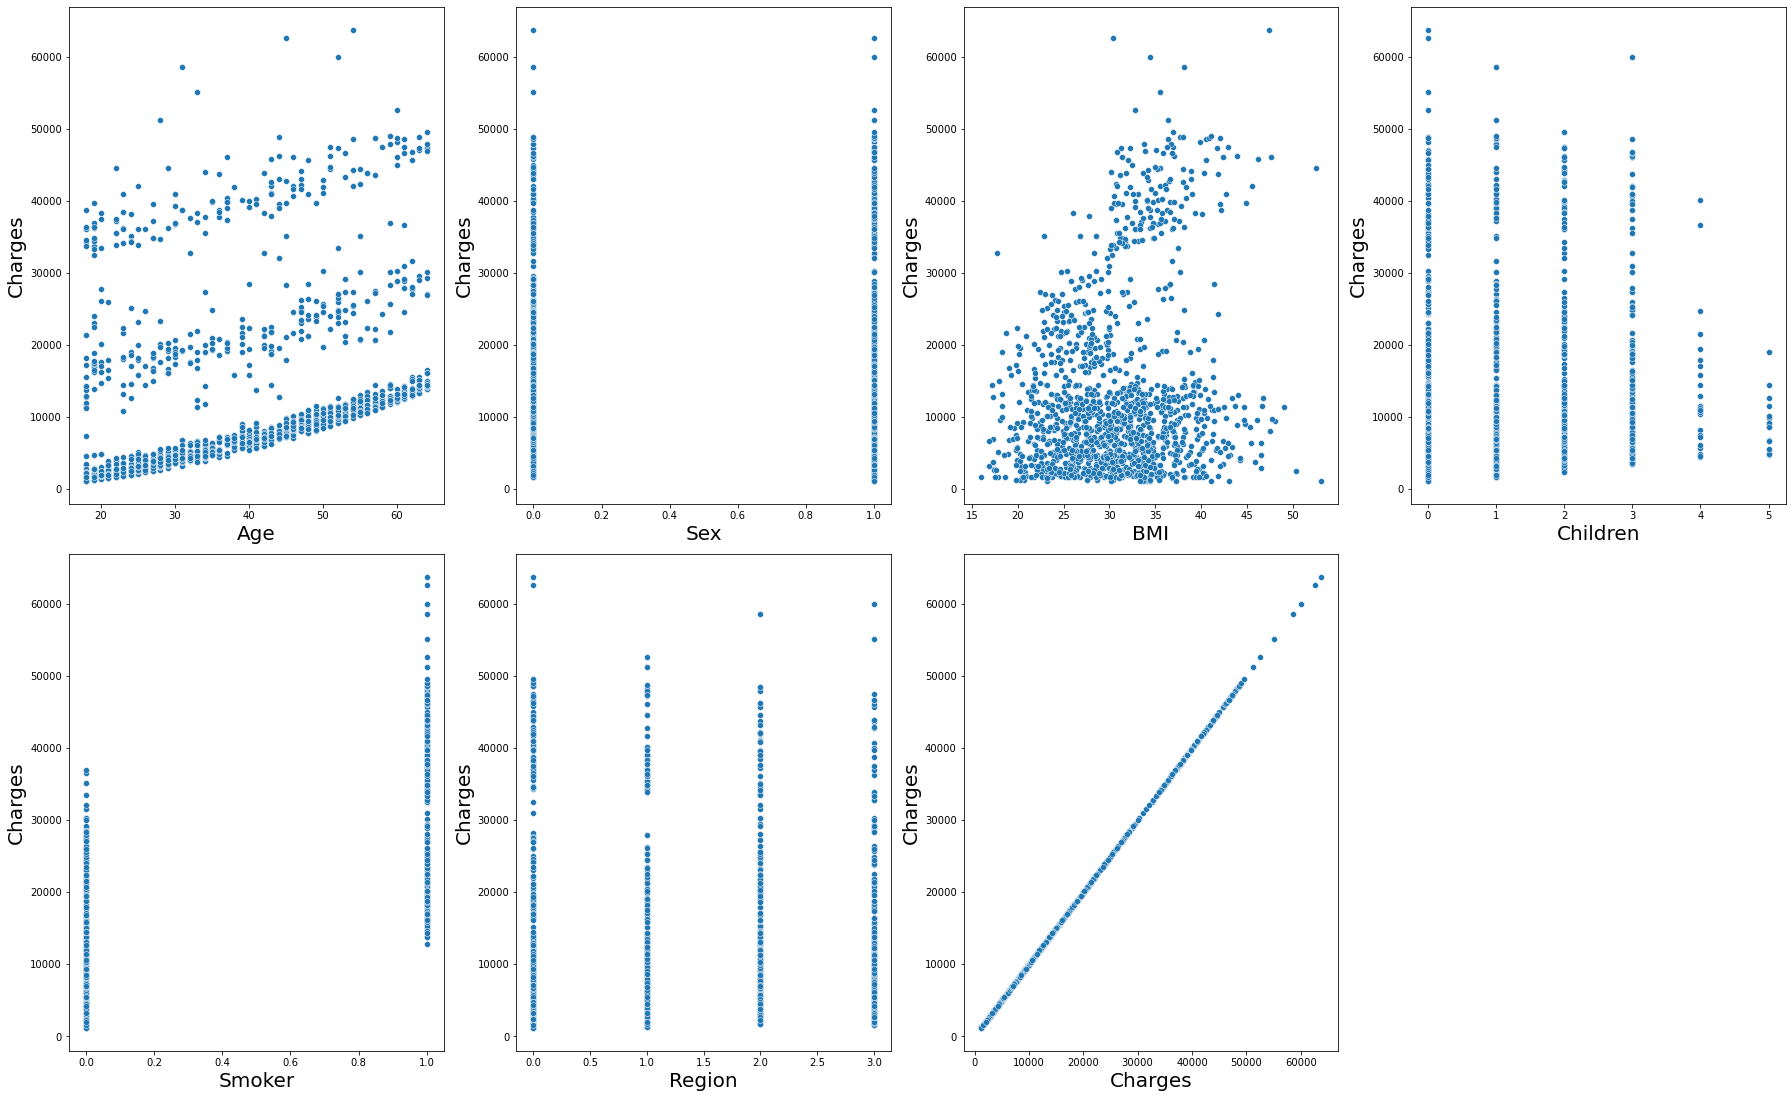

In [25]:
plt.figure(figsize=(25,30), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in insurance_cost1:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graph
        sns.scatterplot(x=insurance_cost1[column].dropna(axis=0)#scatter plot
                        ,y=insurance_cost1.Charges)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Charges',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

## Bivariate and Multivariate Analysis

# Data Preprocessing

## Checking the missing values

In [26]:
## Checking missing values
insurance_cost1.isnull().sum()

Age         0
Sex         0
BMI         0
Children    0
Smoker      0
Region      0
Charges     0
dtype: int64

# # checking for outlier 

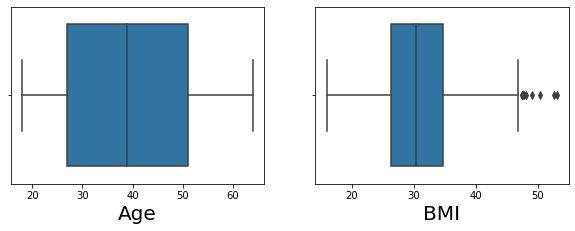

In [27]:
## Lets check outliers in any
Box=insurance_cost1[['Age','BMI']]
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1#counter

for column in Box:#acc
    if plotnumber<=6 : # as there are 9 columns in the data
        ax = plt.subplot(4,2,plotnumber)#plotting 3 graphs
        sns.boxplot(x=Box[column])#boxplot to check for outlier
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        #plt.ylabel
    plotnumber+=1#counter increment 
plt.show()#to show plot

We have observed outliers for BMI

## Handling Outliers

In [28]:
from scipy import stats

## BMI

In [29]:
upper_limit=insurance_cost1.BMI.mean() + 3*insurance_cost1.BMI.std()
lower_limit=insurance_cost1.BMI.mean() - 3*insurance_cost1.BMI.std()

In [30]:
insurance_cost1.loc[insurance_cost['BMI'] > upper_limit]

,Age,Sex,BMI,Children,Smoker,Region,Charges
116,58,1,49.06,0,0,0,11381.3254
847,23,1,50.38,1,0,0,2438.0552
1047,22,1,52.58,1,1,0,44501.3982
1317,18,1,53.13,0,0,0,1163.4627


In [31]:
insurance_cost1.loc[insurance_cost['BMI'] < lower_limit]

,Age,Sex,BMI,Children,Smoker,Region,Charges


In [32]:
## Skweness and Kurtosis test i.e check for normality
from scipy import stats
for column in Box:
    print(stats.skew(Box[column]),column)

0.055610083072599126 Age
0.28372857291709386 BMI


In [33]:
for column in Box:
    print(stats.kurtosis(Box[column]),column)

-1.2449206804584227 Age
-0.05502310583700032 BMI


In [34]:
## Scaling the data.As we will implement linear regression so we need to make all numerical features into same sacle.
## From the EDA stage we have found all numericla variables are normally distributed so we can apply 
## Standard scaler.

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
insurance_cost1[['Age', 'BMI',]]= sc.fit_transform(insurance_cost1[['Age', 'BMI']])

In [36]:
insurance_cost1

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,-1.438764,0,-0.453320,0,1,1,16884.92400
1,-1.509965,1,0.509621,1,0,0,1725.55230
2,-0.797954,1,0.383307,3,0,0,4449.46200
3,-0.441948,1,-1.305531,0,0,3,21984.47061
4,-0.513149,1,-0.292556,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,3,10600.54830
1334,-1.509965,0,0.206139,0,0,2,2205.98080
1335,-1.509965,0,1.014878,0,0,0,1629.83350
1336,-1.296362,0,-0.797813,0,0,1,2007.94500


In [37]:
insurance_cost1

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,-1.438764,0,-0.453320,0,1,1,16884.92400
1,-1.509965,1,0.509621,1,0,0,1725.55230
2,-0.797954,1,0.383307,3,0,0,4449.46200
3,-0.441948,1,-1.305531,0,0,3,21984.47061
4,-0.513149,1,-0.292556,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,3,10600.54830
1334,-1.509965,0,0.206139,0,0,2,2205.98080
1335,-1.509965,0,1.014878,0,0,0,1629.83350
1336,-1.296362,0,-0.797813,0,0,1,2007.94500


# Feature Selection

In [38]:
## Feature selection is done to get that specific features which are important to predict the 
## the target varaible.

## First remove the redundant colunms i.e serial no,customer id,ids
## In second step remove constant columns,the columns not providing information.
## i.e standard deviation=0

In [39]:
insurance_cost1.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,-1.438764,0,-0.453320,0,1,1,16884.92400
1,-1.509965,1,0.509621,1,0,0,1725.55230
2,-0.797954,1,0.383307,3,0,0,4449.46200
3,-0.441948,1,-1.305531,0,0,3,21984.47061
4,-0.513149,1,-0.292556,0,0,3,3866.85520


<AxesSubplot:>

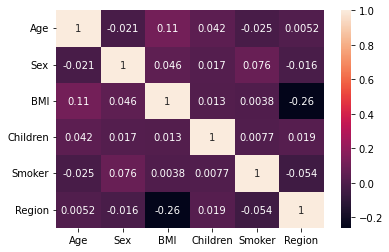

In [40]:
#Checking correlation i.e checking the linear relation between 2 variables.
sns.heatmap(insurance_cost1.drop('Charges',axis=1).corr(),annot=True)

In [41]:
## There seems to be relationship between Age and Sex,Smoker however the relationship is not that strong.So we will not drop 
## further any features

# Model Building

In [42]:
## Defining independent and dependent variables
X=insurance_cost1.drop(columns='Charges',axis=1)
y=insurance_cost1['Charges']

In [43]:
insurance_cost1.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,-1.438764,0,-0.453320,0,1,1,16884.92400
1,-1.509965,1,0.509621,1,0,0,1725.55230
2,-0.797954,1,0.383307,3,0,0,4449.46200
3,-0.441948,1,-1.305531,0,0,3,21984.47061
4,-0.513149,1,-0.292556,0,0,3,3866.85520


In [44]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: Charges, Length: 1338, dtype: float64


### 9. Train/Test split
#### 1. Split data into two part : a training set and a testing set
#### 2. Train the model(s) on training set
#### 3. Test the Model(s) on Testing set

In [45]:
## Defining training and testing data, on training data, model will be created.Now to evaluate the 
## model,testing data is required.However on production you will have unseen data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)


# Linear Regression

###  Import the models

In [88]:
from sklearn.linear_model import LinearRegression ## importing the model library 


###  Model Training

In [89]:
## Model creation

LR=LinearRegression() ## creating the model object 
LR.fit(X_train,y_train) ## fitting the training data.

y_hat=LR.predict(X_test) ## prediciton from model

In [90]:
y_h=LR.predict(X_train)

### Model Evaluation

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

##prediciton on training data
y_train_predict=LR.predict(X_train)


train_score=r2_score(y_train,y_h)
train_score

0.751505643411174

In [50]:
test_score=r2_score(y_test,y_hat)
test_score

0.7447273869684077

In [51]:
# Mean Squared Error & Mean Absolute Error
print("MSE: ", mean_squared_error(y_test, y_hat))
print("MAE: ", mean_absolute_error(y_test, y_hat))

MSE:  38337035.48643883
MAE:  4267.213826730732


In [52]:
# RMSE
import math
print(math.sqrt(mean_squared_error(y_test,y_hat))) # root mean squared error

6191.690842285234


In [53]:
X_train.shape,X_test.shape

((1070, 6), (268, 6))

In [54]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-.75)*(1003-1)/(1003-7-1)
train_adjusted_r2

0.7482412060301508

In [55]:
test_adjusted_r2= 1-(1-.74)*(335-1)/(335-7-1)
test_adjusted_r2

0.7344342507645261

In [56]:
print('intercept:', LR.intercept_) ## c value

intercept: 7451.272108762826


In [57]:
print('slope:', LR.coef_) ## m0,m1,m2,m3,m4,m5

slope: [ 3530.91178882   -26.11715966  2015.58974311   580.27438296
 23928.10171061   212.22242728]


Assumptions of Linear Regression:
- Linearity: Linear relationship exist between dependent and independent variable. In case of non-linearity, use transformation such as logarthmic, exponential, square root etc
- No multicollinearity: If there is multicollinearity its unclear which independent variable explains the dependent variable.
- Errors are normally distributed. If not, then confidence interval may become too wide or narrow.

Pros:
- Simple method
- Easy to use and understand

Cons
- Very sensitive to outliers : often leads to model with low accuracy
- It performs well for linearly seperable datasets. So not recommended for most real world applications as it produces simplified results assuming linear relationship between the data.

# Random Forest

### Import the models

In [81]:
from sklearn.ensemble import RandomForestRegressor


### Model Training

In [82]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [83]:
y_pred3 = rf.predict(X_test)

### Model Evaluation

In [84]:
from sklearn.metrics import r2_score
score3 = metrics.r2_score(y_test,y_pred3)

In [85]:
print(score3)

0.8326348476872487


In [86]:
s3 = metrics.mean_absolute_error(y_test,y_pred3)

In [66]:
print(s3)

2779.822965314478


# Hyper parameter Tuning in Random Forest

n_estimators = number of trees in the foreset

max_features =These are the maximum number of features Random Forest is allowed to try in individual tree. There are multiple options available in Python to assign maximum features

max_depth =The depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data

min_samples_split =the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node

min_samples_leaf = minimum number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

Choose following method for hyperparameter tuning RandomizedSearchCV Fast

GridSearchCV

Assign hyperparameters in form of dictionery

Fit the model

Check best paramters and best scor

In [68]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(X) for X in np.linspace(start=200, stop=2000, num=10)]       #Number of decision trees
max_features = ['log2', 'sqrt']                                  #maximum number of features allowed to try in individual tree
max_depth = [int(X) for X in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf = RandomForestRegressor(random_state=2)#model

rf_cv = RandomizedSearchCV(estimator=rf, scoring='r2',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=2, n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes that we are going to provide 
#n_iter--->Number of combinations to try
##cv------> number of folds
#verbose=Controls the verbosity:the greater the number, the more detail you will get.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#n_jobs----> if you specify n_jobs to -1, it will use all cores in CPU. If it is set to 1 or 2, it will use one or two cores only 





rf_cv.fit(X_train, y_train)                                  ##training data on randomsearch cv
rf_best_params = rf_cv.best_params_                          ##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")                  ##printing  best parameters
 


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False})


In [69]:
#passing best parameter to randomforest
rf_2 = RandomForestRegressor(n_estimators= 400, min_samples_split= 5, min_samples_leaf= 1, 
                                 max_features= 'log2', max_depth= 90, bootstrap= False)



rf_2.fit(X_train, y_train)

y_predict=rf_2.predict(X_test)

r2_score(y_test,y_predict)

0.8422406564889963

# Gradient Boosting

### Import the models

In [70]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor


### Model Training

In [ ]:
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price

### Model Evaluation

In [71]:
## evaluatin the model
from sklearn.metrics import r2_score# to check model performance
r2_score(y_test,y_gbm)#checking r2score




0.8685851952582885

In [72]:
adj_r2_score=1-(1-0.87)*(1050-1)/(1050-7-1)#adjusted r2 score
adj_r2_score

0.8691266794625719

In [73]:
X_test.shape#rows and columns

(268, 6)

In [74]:
X_train.shape

(1070, 6)

# XGBOOST

### Import the models

In [75]:
## Installing XGB library

!pip install xgboost

### Model Training

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 882 to 1192
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1070 non-null   float64
 1   Sex       1070 non-null   int64  
 2   BMI       1070 non-null   float64
 3   Children  1070 non-null   int64  
 4   Smoker    1070 non-null   int64  
 5   Region    1070 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 58.5 KB


In [77]:
## model creation
#importing the model library
from xgboost import XGBRegressor

#xgb_r = XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)


xgb_r= XGBRegressor() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price

### Model Evaluation

In [87]:
from sklearn.metrics import r2_score
r2_score(y_test,y_hat)#R2 score

0.8217240157154369

**Pros**

1 Less feature engineering required (No need for scaling, normalizing data, can also handle missing values well)

2 Feature importance can be found out(it output importance of each feature, can be used for feature selection)

3 Outliers have minimal impact.

4 Handles large sized datasets well.

5 Good Execution speed

6 Good model performance (wins most of the Kaggle competitions)

7 Less prone to overfitting

**Cons**

1 Difficult interpretation , visualization tough

2 Overfitting possible if parameters not tuned proper



# Conclusion

 Since i have tried with all 4 models in which **Gradient Boosting** model gives more r2 score for testing data

​